In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\user\AppData\Local\Temp\ipykernel_8604\1018955272.py:11: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(
C:\Users\user\AppData\Local\Temp\ipykernel_8604\1018955272.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibm

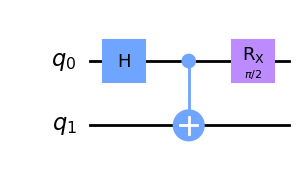

In [6]:
# Bell state density matrix
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.rx(np.pi/2,0)

#bell.cx(0, 1)
bell.draw(output='mpl');
display(bell.draw(output='mpl'))

In [4]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

tomo_circuits = state_tomography_circuits(bell, qc.qubits)

C:\Users\user\AppData\Local\Temp\ipykernel_8604\3814640290.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


TypeError: unsupported operand type(s) for +=: 'QuantumCircuit' and 'QuantumCircuit'

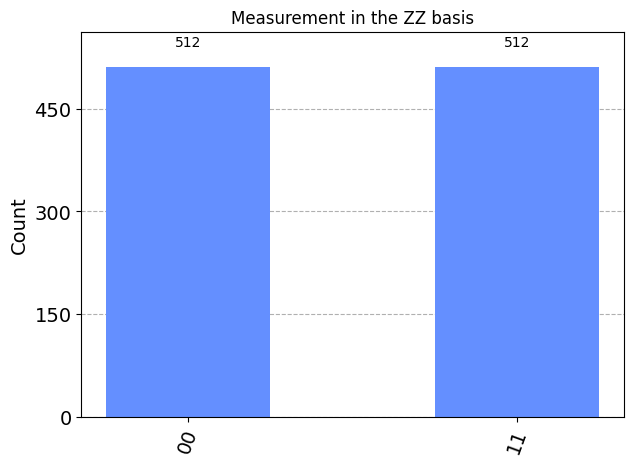

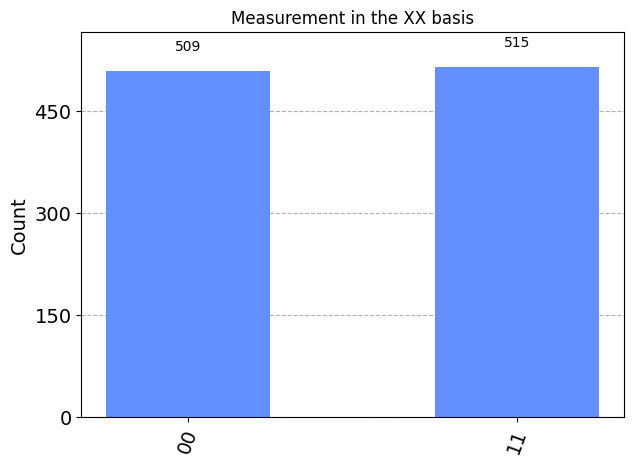

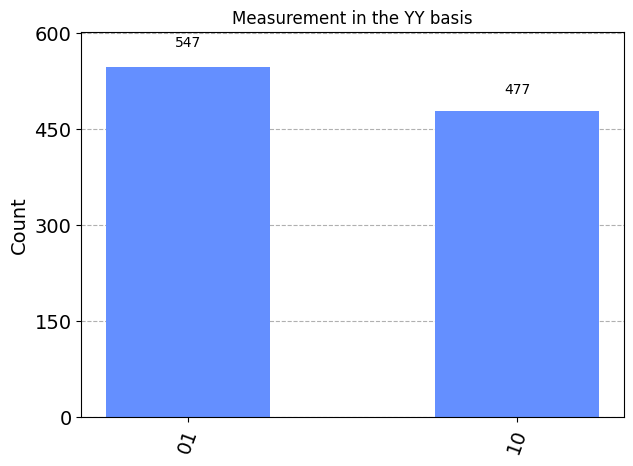

In [7]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import numpy as np

# Original circuit
qc = QuantumCircuit(2,2) # Create a quantum circuit with 2 qubits and 2 classical bits
qc.h(0)
qc.cx(0, 1)

# Create measurement circuits
meas_zz = QuantumCircuit(2, 2)
meas_zz.measure([0,1], [0,1])

meas_xx = QuantumCircuit(2, 2)
meas_xx.h([0,1])
meas_xx.measure([0,1], [0,1])

meas_yy = QuantumCircuit(2, 2)
meas_yy.sdg([0,1])
meas_yy.h([0,1])
meas_yy.measure([0,1], [0,1])

# Create tomography circuits
tomography_circuits = []
bases = ['ZZ', 'XX', 'YY']
for meas_circ in [meas_zz, meas_xx, meas_yy]:
    tomography_circ = qc.compose(meas_circ)
    tomography_circuits.append(tomography_circ)

simulator = Aer.get_backend('qasm_simulator')

# Execute the circuits and draw histograms
histograms = []  # List to hold the histograms

for i, tomography_circ in enumerate(tomography_circuits):
    result = execute(tomography_circ, backend=simulator, shots=1024).result()
    counts = result.get_counts(tomography_circ)

    # Plot histogram and add it to the list
    histogram = plot_histogram(counts, title=f"Measurement in the {bases[i]} basis")
    histograms.append(histogram)

# Now, display the histograms
for histogram in histograms:
    display(histogram)


In [8]:
from matplotlib import pyplot as plt

# Draw each tomography circuit
for i, tomography_circuit in enumerate(tomography_circuits):
    tomography_circuit.draw(output='mpl')



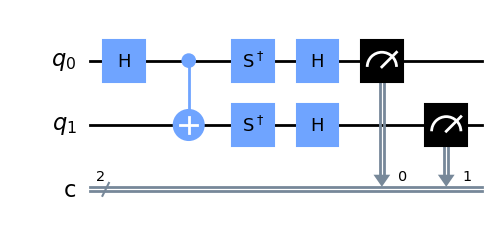

In [14]:
tomography_circuits[2].draw(output='mpl')


In [24]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Original circuit
qc = QuantumCircuit(2,2) # Create a quantum circuit with 2 qubits and 2 classical bits
qc.h(0)
qc.cx(0, 1)

# Create measurement circuits
meas_zz = QuantumCircuit(2, 2)
meas_zz.measure([0,1], [0,1])

meas_xx = QuantumCircuit(2, 2)
meas_xx.h([0,1])
meas_xx.measure([0,1], [0,1])

meas_yy = QuantumCircuit(2, 2)
meas_yy.sdg([0,1])
meas_yy.h([0,1])
meas_yy.measure([0,1], [0,1])

# Create tomography circuits
tomography_circuits = []
bases = ['ZZ', 'XX', 'YY']
for meas_circ in [meas_zz, meas_xx, meas_yy]:
    tomography_circ = qc + meas_circ
    tomography_circuits.append(tomography_circ)

# Get the simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuits and draw histograms
for i, tomography_circ in enumerate(tomography_circuits):
    result = execute(tomography_circ, backend=simulator, shots=1024).result()
    counts = result.get_counts(tomography_circ)

    # Plot histogram
    plt.figure()
    plot_histogram(counts).show()
    plt.title(f"Measurement in the {bases[i]} basis")


TypeError: unsupported operand type(s) for +: 'QuantumCircuit' and 'QuantumCircuit'